In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import *

Data= pd.read_csv("Social_Network_Ads.csv")

Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [31]:
Data.shape

(400, 6)

In [17]:
Data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
#Encoding Gender

Data['Gender'] = Data['Gender'].astype('category')

Data['Gender_cat']=Data['Gender'].cat.codes

Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_cat
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [19]:
#Setting up independent and dependent


data_x = Data[['Age','Gender_cat']]

data_y= Data[['Purchased']]


#split train - test data
train_x,test_x,train_y,test_y=model_selection.train_test_split(data_x,data_y,train_size=0.5,random_state=1)


# LOGISITIC REGRESSION
<hr>

In [20]:
#Create model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(train_x,train_y)

LogisticRegression(C=100000.0)

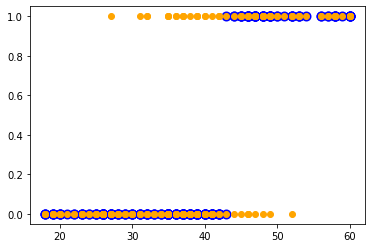

In [21]:
#predict
pred_y=logreg.predict(test_x)

plt.scatter(test_x['Age'],pred_y,color='blue',linewidths=4)
plt.scatter(test_x['Age'],test_y,color='orange')

plt.show()

In [22]:
#mse r2score
mse=metrics.mean_squared_error(test_y,pred_y)
rscore=metrics.r2_score(test_y,pred_y)
print('Mean Square Error: {}\n Correlation score: {}'.format(mse,rscore) )

Mean Square Error: 0.165
 Correlation score: 0.28385416666666663


# DECISION TREE
<hr>


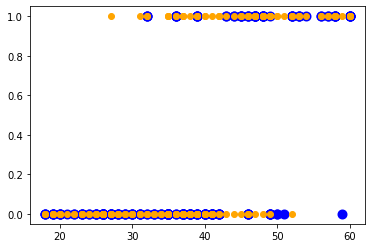

In [23]:
#Tree Classifier
Dtree = tree.DecisionTreeClassifier()
Dtree.fit(train_x,train_y)


pred_y=Dtree.predict(test_x)

plt.scatter(test_x['Age'],pred_y,color='blue',linewidths=4)
plt.scatter(test_x['Age'],test_y,color='orange')

plt.show()

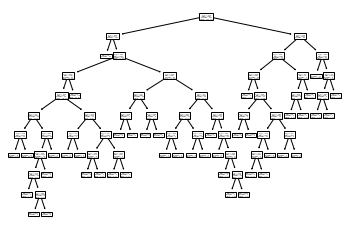

In [24]:
fig = tree.plot_tree(Dtree)

In [25]:
#mse r2score
mse=metrics.mean_squared_error(test_y,pred_y)
rscore=metrics.r2_score(test_y,pred_y)
print('Mean Square Error: {}\n Correlation score: {}'.format(mse,rscore) )

Mean Square Error: 0.21
 Correlation score: 0.08854166666666663


# RANDOM FOREST
<hr>

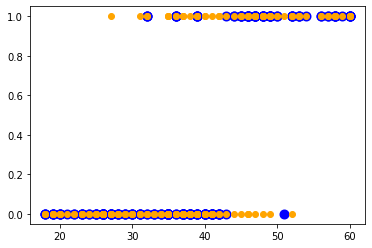

In [26]:
RF = ensemble.RandomForestClassifier()
RF.fit(train_x,train_y)


pred_y=RF.predict(test_x)

plt.scatter(test_x['Age'],pred_y,color='blue',linewidths=4)
plt.scatter(test_x['Age'],test_y,color='orange')

plt.show()

In [27]:
#mse r2score
mse=metrics.mean_squared_error(test_y,pred_y)
rscore=metrics.r2_score(test_y,pred_y)
print('Mean Square Error: {}\n Correlation score: {}'.format(mse,rscore) )

Mean Square Error: 0.195
 Correlation score: 0.15364583333333326


# SVM

<hr>

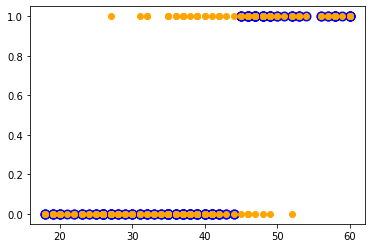

In [28]:
sv = svm.SVC()
sv.fit(train_x,train_y)


pred_y=sv.predict(test_x)

plt.scatter(test_x['Age'],pred_y,color='blue',linewidths=4)
plt.scatter(test_x['Age'],test_y,color='orange')

plt.show()

In [29]:
#mse r2score
mse=metrics.mean_squared_error(test_y,pred_y)
rscore=metrics.r2_score(test_y,pred_y)
print('Mean Square Error: {}\n Correlation score: {}'.format(mse,rscore) )

Mean Square Error: 0.16
 Correlation score: 0.3055555555555556
